In [1]:
import pandas as pd
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.metrics import classification_report
import random
import time
import numpy as np
from matplotlib import pyplot as plt

random.seed(time.time())

In [2]:
data = pd.read_csv('./All_States_GE.csv')

C:\Users\Rahul\AppData\Local\Temp\ipykernel_1308\3516144033.py:1: DtypeWarning: Columns (17,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./All_States_GE.csv')


In [3]:
# subset df statename, party
subsets = ['State_Name', 'Turncoat', 'Party', 'No_Terms']
subsetDf = data[subsets]
# convert turncoat boolean to int
subsetDf = subsetDf.dropna(subset=subsets)
subsetDf['Turncoat'] = subsetDf['Turncoat'].astype(int)
subsetDf

,State_Name,Turncoat,Party,No_Terms
0,Andaman_&_Nicobar_Islands,0,INC,1.0
1,Andaman_&_Nicobar_Islands,0,BJP,0.0
2,Andaman_&_Nicobar_Islands,0,IND,0.0
3,Andaman_&_Nicobar_Islands,0,AAAP,0.0
4,Andaman_&_Nicobar_Islands,0,BSP,0.0
...,...,...,...,...
91664,Mysore,0,SWA,0.0
91665,Uttar_Pradesh,0,INC,1.0
91666,Uttar_Pradesh,0,IND,0.0
91667,Uttar_Pradesh,0,IND,0.0


In [4]:
subsetDf2 = subsetDf.copy()
subsetDf2


,State_Name,Turncoat,Party,No_Terms
0,Andaman_&_Nicobar_Islands,0,INC,1.0
1,Andaman_&_Nicobar_Islands,0,BJP,0.0
2,Andaman_&_Nicobar_Islands,0,IND,0.0
3,Andaman_&_Nicobar_Islands,0,AAAP,0.0
4,Andaman_&_Nicobar_Islands,0,BSP,0.0
...,...,...,...,...
91664,Mysore,0,SWA,0.0
91665,Uttar_Pradesh,0,INC,1.0
91666,Uttar_Pradesh,0,IND,0.0
91667,Uttar_Pradesh,0,IND,0.0


In [5]:
tobeEncoded = [x for x in subsetDf2.columns if subsetDf2[x].dtype == 'object']
tobeEncoded

['State_Name', 'Party']

In [6]:
encoder = preprocessing.LabelEncoder()
for x in tobeEncoded:
    subsetDf2[x] = encoder.fit_transform(subsetDf2[x])

In [7]:
# find correlation between turncoat and no_terms
corrDF = pd.DataFrame()
corrDF['Turncoat'] = subsetDf2['Turncoat']
corrDF['No_Terms'] = subsetDf2['No_Terms']

corrDF['No_Terms'].corr(corrDF['Turncoat'])

0.21068799798532806

Logistic Regression | 0.748: 100%|██████████| 100/100 [00:02<00:00, 47.43it/s]


              precision    recall  f1-score   support

           0       0.70      0.88      0.78     57614
           1       0.84      0.62      0.71     57886

    accuracy                           0.75    115500
   macro avg       0.77      0.75      0.74    115500
weighted avg       0.77      0.75      0.74    115500

State_Name: 0.003928343945882669
Party: 0.000548352390049521
No_Terms: 1.1651572210788177


Decision Tree       | 0.790: 100%|██████████| 100/100 [00:01<00:00, 93.97it/s]


              precision    recall  f1-score   support

           0       0.79      0.79      0.79     57619
           1       0.79      0.80      0.79     57881

    accuracy                           0.79    115500
   macro avg       0.79      0.79      0.79    115500
weighted avg       0.79      0.79      0.79    115500

State_Name: 0.14388914963649987
Party: 0.47658382451192355
No_Terms: 0.3795270258515766


Random Forest       | 0.796: 100%|██████████| 100/100 [00:22<00:00,  4.48it/s]


              precision    recall  f1-score   support

           0       0.82      0.76      0.79     57939
           1       0.77      0.84      0.80     57561

    accuracy                           0.80    115500
   macro avg       0.80      0.80      0.80    115500
weighted avg       0.80      0.80      0.80    115500

State_Name: 0.12773287517569562
Party: 0.5985332247458817
No_Terms: 0.2737339000784228


Gradient Boosting   | 0.803: 100%|██████████| 100/100 [00:14<00:00,  6.88it/s]


              precision    recall  f1-score   support

           0       0.85      0.73      0.79     57536
           1       0.77      0.88      0.82     57964

    accuracy                           0.80    115500
   macro avg       0.81      0.80      0.80    115500
weighted avg       0.81      0.80      0.80    115500

State_Name: 0.01862792056294057
Party: 0.4810607331043636
No_Terms: 0.500311346332696


SVM                 | 0.635: 100%|██████████| 100/100 [00:50<00:00,  1.99it/s]


              precision    recall  f1-score   support

           0       0.61      0.77      0.68     57696
           1       0.68      0.50      0.58     57804

    accuracy                           0.64    115500
   macro avg       0.65      0.64      0.63    115500
weighted avg       0.65      0.64      0.63    115500



KNN                 | 0.787: 100%|██████████| 100/100 [00:02<00:00, 37.61it/s]


              precision    recall  f1-score   support

           0       0.82      0.74      0.78     57505
           1       0.76      0.84      0.80     57995

    accuracy                           0.79    115500
   macro avg       0.79      0.79      0.79    115500
weighted avg       0.79      0.79      0.79    115500



Naive Bayes         | 0.667: 100%|██████████| 100/100 [00:00<00:00, 135.24it/s]


              precision    recall  f1-score   support

           0       0.62      0.87      0.72     57891
           1       0.78      0.46      0.58     57609

    accuracy                           0.67    115500
   macro avg       0.70      0.67      0.65    115500
weighted avg       0.70      0.67      0.65    115500



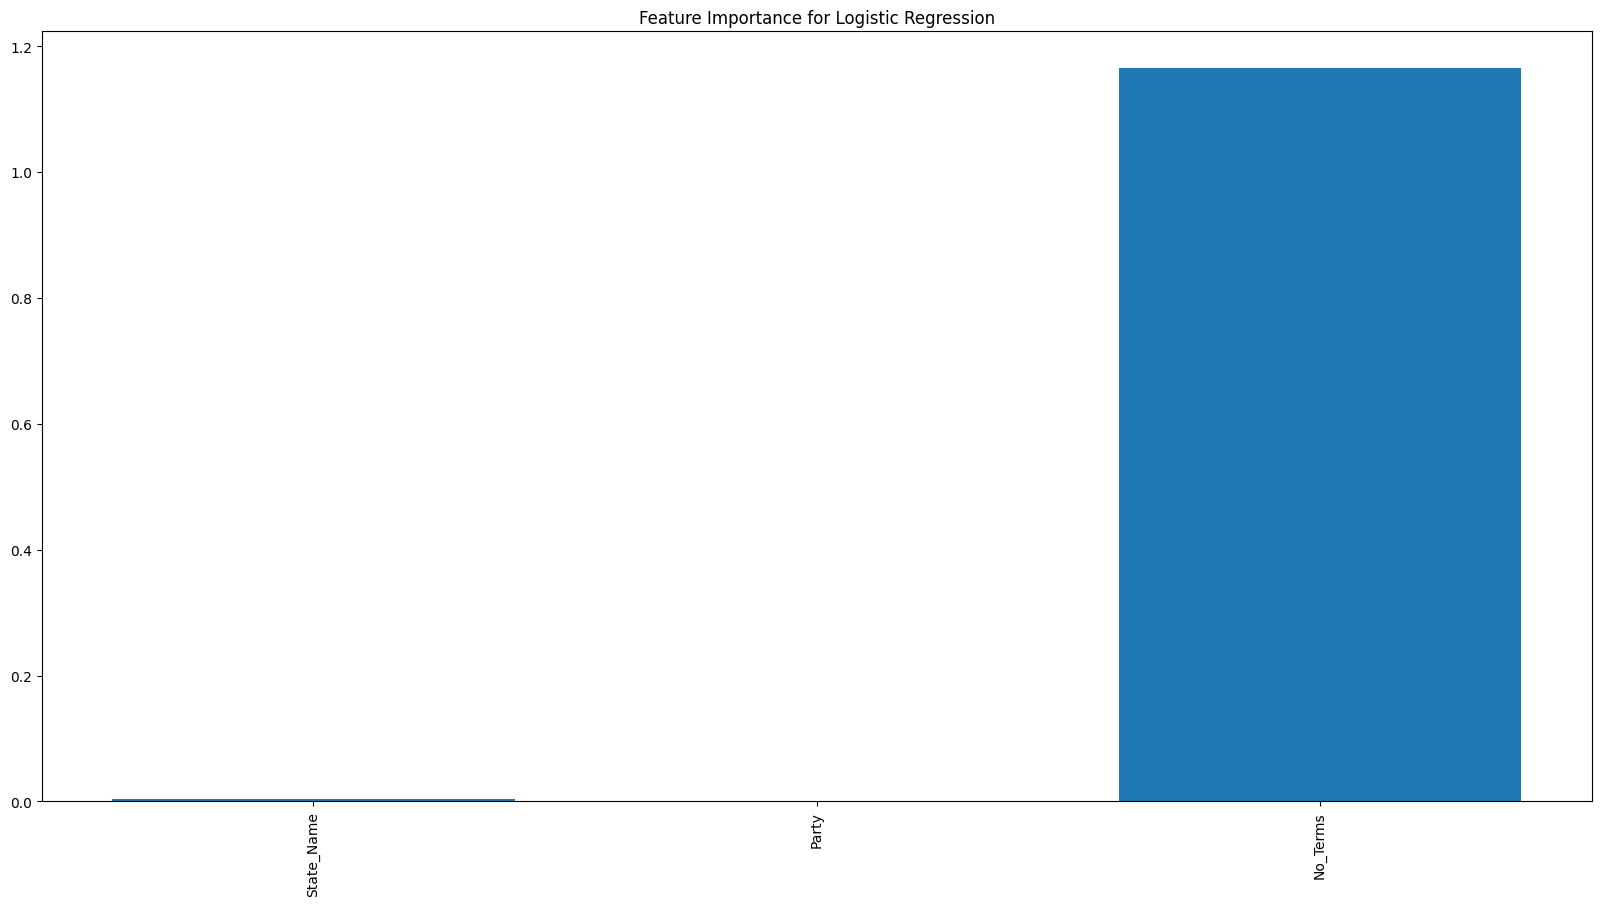

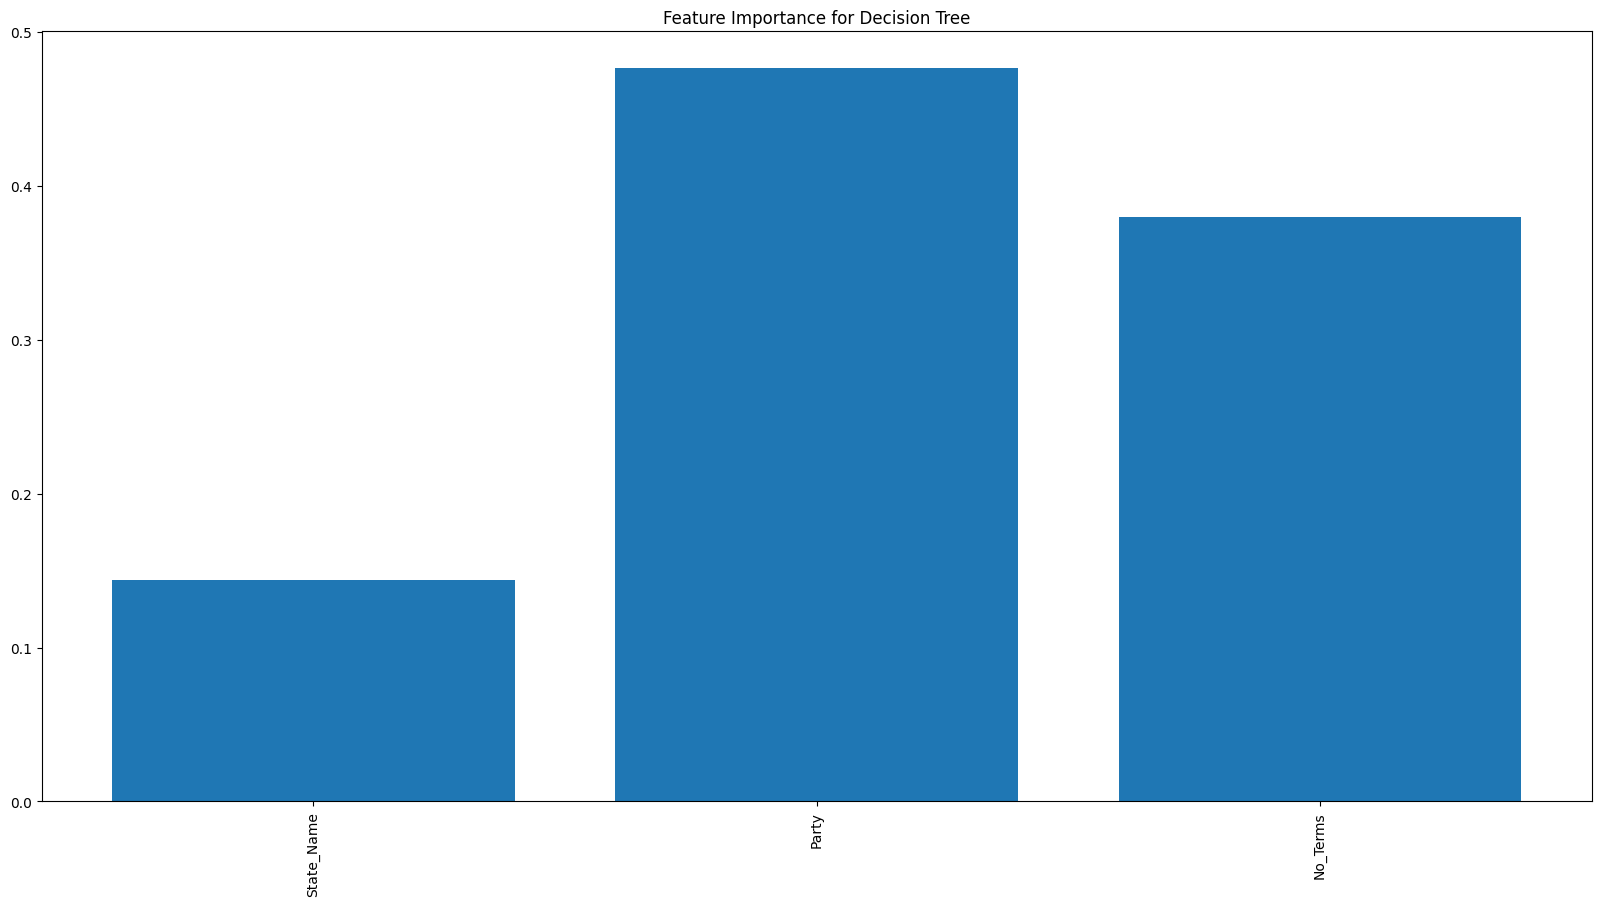

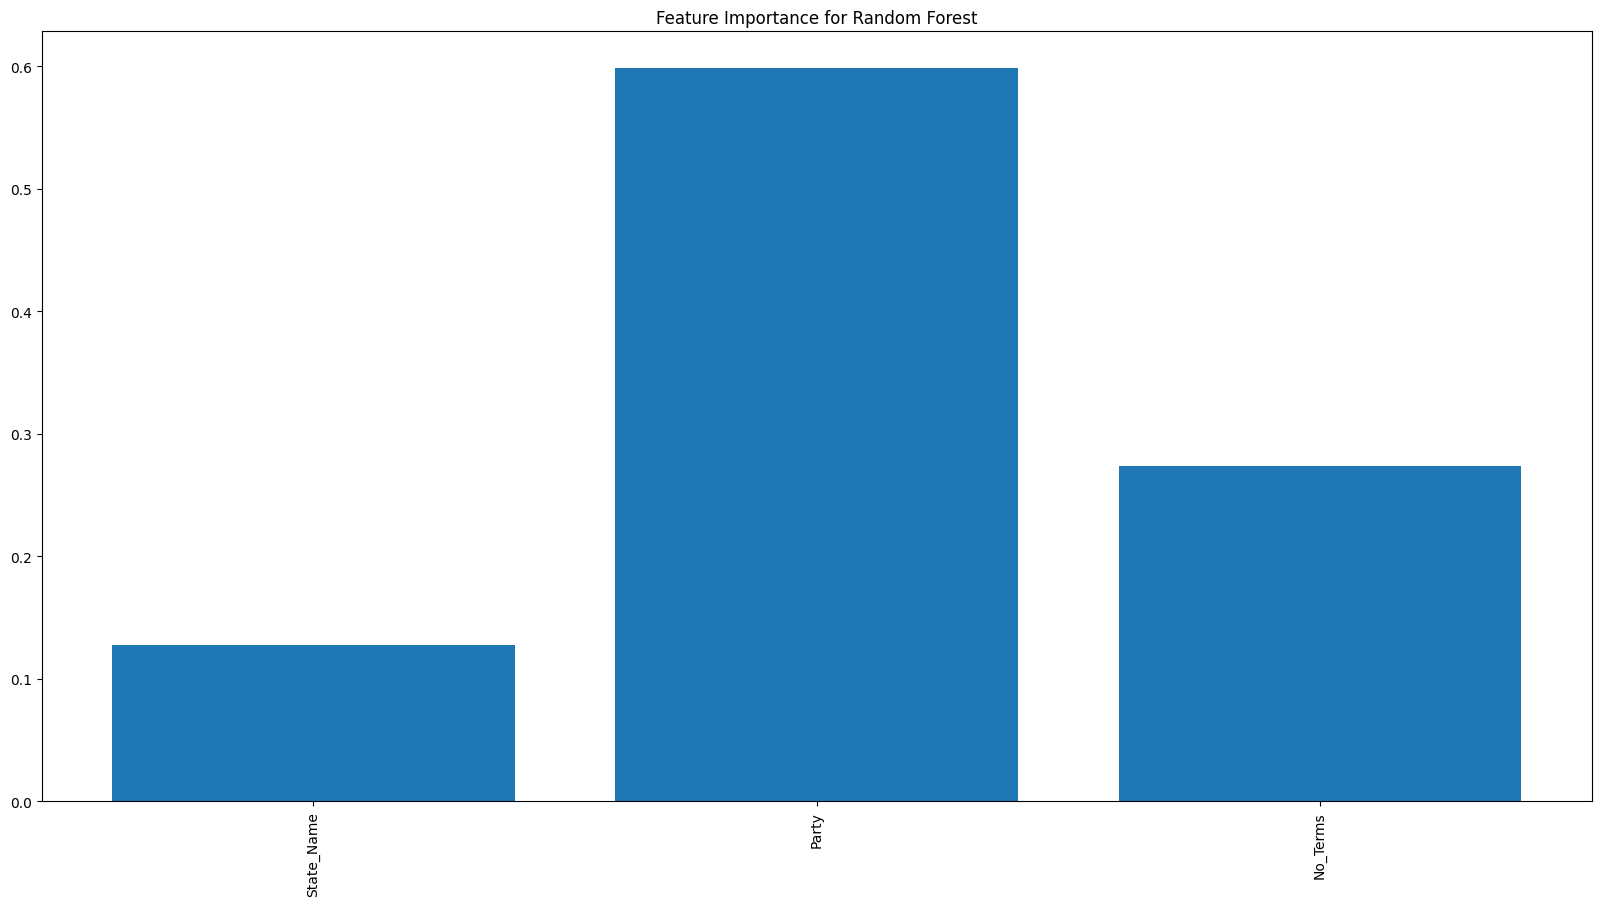

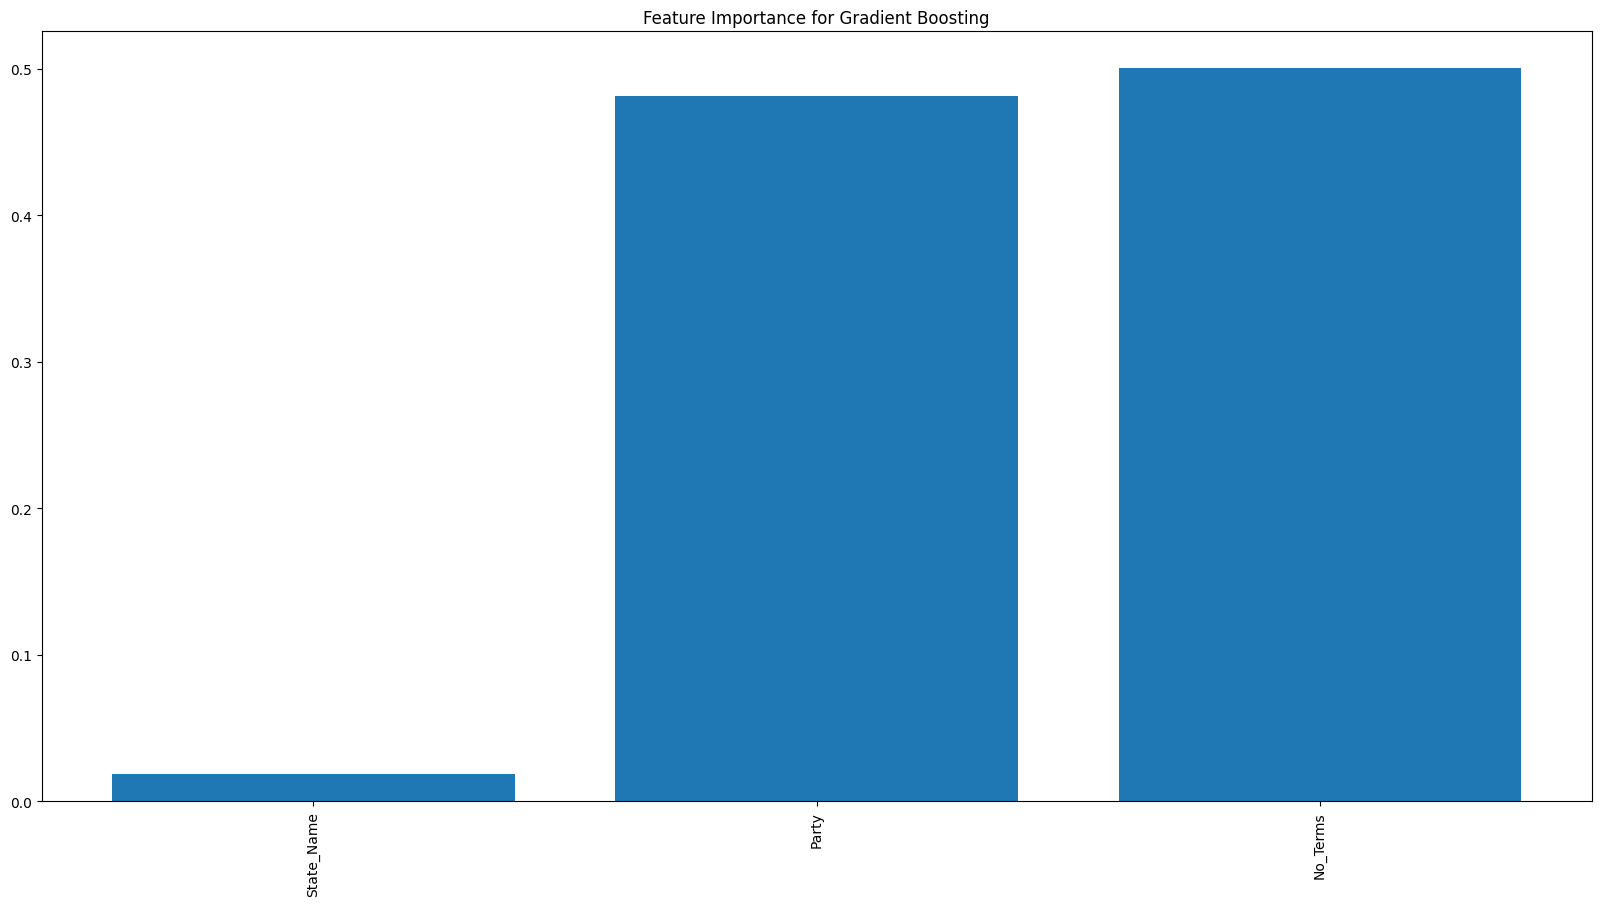

In [8]:
outputDir = "./output/classification/"
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB())
]

maxLength = 0
for name, model in models:
    maxLength = max(maxLength, len(name))

ITERATIONS = 100

for name, model in models:
    # print(name)
    spaces = ' ' * (maxLength - len(name))
    values = []
    bar = tqdm(range(ITERATIONS))
    avgAcc = 0
    total = 0
    predictedVals = []
    actualVals = []
    importances = {}
    for i in bar:
        bar.set_description(f"{name}{spaces} | {avgAcc/(1 if total == 0 else total):.3f}")
        subsetDf3 = subsetDf2.groupby('Turncoat').apply(lambda x: x.sample(subsetDf2['Turncoat'].value_counts().min()).reset_index(drop=True))

        X = subsetDf3.drop('Turncoat', axis=1)
        Y = subsetDf3['Turncoat']

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random.randint(0, 1000))

        model.fit(X_train, Y_train)

        # Calculate feature importances if available
        if hasattr(model, 'feature_importances_'):
            for feat, importance in zip(X.columns, model.feature_importances_):
                if feat not in importances:
                    importances[feat] = []
                importances[feat].append(importance)

        # Or print coefficients if available (such as for Logistic Regression)
        elif hasattr(model, 'coef_'):
            for feat, coef in zip(X.columns, model.coef_[0]):
                if feat not in importances:
                    importances[feat] = []
                importances[feat].append(coef)

        predictions = model.predict(X_test)
        accuracy = accuracy_score(Y_test, predictions)
        predictedVals.extend(predictions)
        actualVals.extend(Y_test)
        values.append(accuracy)
        avgAcc += accuracy
        total += 1

    print(classification_report(actualVals, predictedVals))
    # feature importance
    if len(importances) > 0:
        for feat, importance in importances.items():
            print(f'{feat}: {np.mean(importance)}')

        # Plot theses values
        plt.figure(figsize=(20, 10))
        plt.bar(importances.keys(), [np.mean(importance) for importance in importances.values()])
        plt.xticks(rotation=90)
        plt.title(f'Feature Importance for {name}')
        plt.savefig(f'{outputDir}{name}_feature_importance.png')

        

            

